# Data Science Course
## Project
### First submission
### Jorge Garciadiego

In [2]:
import numpy as numpy
import pandas as pd

In [3]:
df = pd.read_csv('data/full.csv')

Before digging into the data lets get a breif summary of what we got

In [4]:
df.info(verbose=False, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Columns: 21 entries, age to y
dtypes: float64(5), int64(5), object(11)
memory usage: 30.3 MB


## First Aproach

>- The entire dataset contains 41188 rows ans 21 columns
>- Many of the String variables(11) are cathegorical.
>> * From those cathegorical columns sutch as `default`, `housing`, `loan` contain `unknown` values. it seams that without those observations these variables could be treated as binary. _Its important to note that unknow can mean either yes or no, so for converting thses columns to bynary we would have to treat `unknown` as `Nan` values and ignore them_ 

In [5]:
# Lets see the head of the dataframe

df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Target Exploration
## Findings

1. positive skewe in the age variable
2. 75% of the ofserbations havent been contacted before. 
3. presumable a relationship between the `loan` and the `defalt`

In [20]:
# Lets filter the dataset by looking for the clients that answered yes to has the client subscribed a term deposit?

target = df[df['y'] == 'yes' ]

In [21]:
target

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Now lets observe the summarized information for this segmentation of the data

In [25]:
target.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4640 entries, 75 to 41186
Columns: 21 entries, age to y
dtypes: float64(5), int64(5), object(11)
memory usage: 797.5+ KB


Our target segmentation represents **`11.26%`** of the hole campain dataset with `4640` observations

In [29]:
(len(target)/len(df)) * 100

11.265417111780131

In [30]:
# lets describe target
target.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000
mean,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991
std,13.837476,401.171871,1.666245,403.407181,0.860344,1.623626,0.676644,6.139668,1.742598,87.572641
min,17.000000,37.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,253.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,0.849000,5017.500000
50%,37.000000,449.000000,2.000000,999.000000,0.000000,-1.800000,93.200000,-40.400000,1.266000,5099.100000
75%,50.000000,741.250000,2.000000,999.000000,1.000000,-0.100000,93.918000,-36.100000,4.406000,5191.000000
max,98.000000,4199.000000,23.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### 1. If we look at the age we can see that there is a positive skewe to the left since the mean `(40.91)` is less than the median `(37.00)`

In [36]:
target.age.mode()

0    31
dtype: int64

<AxesSubplot:>

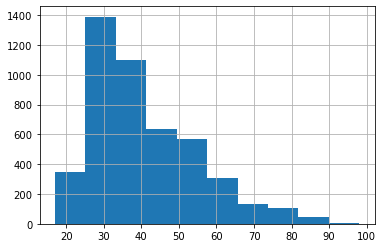

In [37]:
target.age.hist()

### 2. Its interesting that the `pdays` for this segment of the dataset 75% of the ofserbations havent been contacted before. 

In [42]:
target[target['pdays'] < 999].info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967 entries, 24613 to 41178
Columns: 21 entries, age to y
dtypes: float64(5), int64(5), object(11)
memory usage: 166.2+ KB


Since 999 means client was not previously contacted for our target only 20.84% of the data has been contacted before, therefore the mean for this observation is not very representative 

In [45]:
(target[target['pdays'] < 999].pdays.count()/target.pdays.count()) * 100

20.84051724137931

If we assolate the observations that are less than 999 we can see that the mean goes to `5.91`

In [47]:
target[target['pdays'] < 999].pdays.mean()

5.913133402275077

<AxesSubplot:>

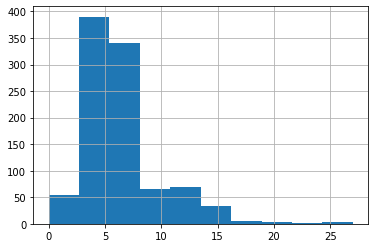

In [41]:
target[target['pdays'] < 999].pdays.hist()

### 3. Its presumable a relationship between the `loan` and the `defalt` variables, we can see that `3850` persons don't have a loan and the majority of the observations `(4197)`don't have a default credit

In [57]:
target.loan.value_counts()

no         3850
yes         683
unknown     107
Name: loan, dtype: int64

In [58]:
target.default.value_counts()

no         4197
unknown     443
Name: default, dtype: int64